In [9]:
import pandas as pd
import random

# Load your dataset
df = pd.read_csv('augmented_thesis_data.csv')

# Filter hypertensive cases
hypertensive_df = df[df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'] == 'H']

# Function to augment hypertensive cases
def augment_hypertensive_cases(df, target_rows):
    augmented_records = []

    while len(augmented_records) < target_rows:
        row = df.sample(n=1).iloc[0]
        new_row = row.copy()

        # Randomize age with slight variations
        new_row['Age (years)'] = max(0, row['Age (years)'] + random.randint(-1, 1))

        # Randomize systolic and diastolic blood pressure values
        new_row['SBP3'] = max(120, min(160, row['SBP3'] + random.randint(-5, 5)))
        new_row['Mean SBP (not rounded)'] = new_row['SBP3']
        new_row['Mean SBP (Rounded to two digits)'] = round(new_row['SBP3'], 1)

        new_row['DBP1'] = max(80, min(100, row['DBP1'] + random.randint(-3, 3)))
        new_row['DBP2'] = max(80, min(100, row['DBP2'] + random.randint(-3, 3)))
        new_row['DBP3'] = max(80, min(100, row['DBP3'] + random.randint(-3, 3)))

        # Add slight variations to weight and height to affect BMI
        new_row['Weight (Kg)'] = max(10, row['Weight (Kg)'] + random.uniform(-1, 1))
        new_row['Height (metre)'] = max(0.5, row['Height (metre)'] + random.uniform(-0.02, 0.02))
        new_row['Height (in cm)'] = new_row['Height (metre)'] * 100

        # Keep it classified as hypertensive
        new_row['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'] = 'H'

        augmented_records.append(new_row)

    return pd.DataFrame(augmented_records)

# Specify how many new hypertensive cases you want to create (e.g., 100 more cases)
num_to_augment = 100
augmented_hypertensive_df = augment_hypertensive_cases(hypertensive_df, num_to_augment)

# Combine original data with augmented hypertensive cases
balanced_df = pd.concat([df, augmented_hypertensive_df], ignore_index=True)

# Optionally, save the balanced dataset
balanced_df.to_csv('balanced_augmented_thesis_data.csv', index=False)

# Display the first few rows of the new dataset
print(balanced_df.head())


   Serial number Patient Initials Gender  Age (years) Comorbidities  \
0            1.0               AC      M          6.0             N   
1           26.0               MA      M          6.0             N   
2           62.0               AN      M          6.0             N   
3           82.0              HNN      M          6.0             N   
4          102.0              TRE      M          6.0             N   

  Family history of hypertension History of hypertensive crisis  Weight (Kg)  \
0                              Y                              N         28.0   
1                              N                              N         20.0   
2                              N                              N         27.0   
3                              N                              N         27.0   
4                              N                              N         27.0   

   Height (metre)  Height (in cm)  ...   SBP3 Mean SBP (not rounded)  \
0            1.15   

In [11]:
# Check class distribution
class_counts = balanced_df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'].value_counts()

# Display class distribution
print("Class Distribution after Augmentation:")
print(class_counts)


Class Distribution after Augmentation:
According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1
N      342
H      111
PH      30
PH       1
Name: count, dtype: int64


In [13]:
# Clean up the class column by removing leading/trailing spaces and standardizing labels
balanced_df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'] = \
    balanced_df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'].str.strip()

# Check the corrected class distribution
class_counts = balanced_df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'].value_counts()
print("Class Distribution after Fixing Labels:")
print(class_counts)


Class Distribution after Fixing Labels:
According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1
N     342
H     111
PH     31
Name: count, dtype: int64


In [15]:
# Filter prehypertensive cases
prehypertensive_df = balanced_df[balanced_df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'] == 'PH']

# Augment prehypertensive cases
num_to_augment_ph = 100  # You can adjust this based on how balanced you want the classes to be
augmented_prehypertensive_df = augment_hypertensive_cases(prehypertensive_df, num_to_augment_ph)

# Combine the augmented hypertensive and prehypertensive cases with the original dataset
balanced_df = pd.concat([balanced_df, augmented_prehypertensive_df], ignore_index=True)

# Recheck the class distribution after augmentation
class_counts = balanced_df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'].value_counts()
print("Class Distribution after Additional Augmentation:")
print(class_counts)


Class Distribution after Additional Augmentation:
According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1
N     342
H     211
PH     31
Name: count, dtype: int64


In [17]:
# Save the balanced and augmented dataset to a CSV file
balanced_df.to_csv('balanced_augmented_thesis_data.csv', index=False)


Class Distribution after Augmentation:
According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1
N     342
H     111
PH     31
Name: count, dtype: int64


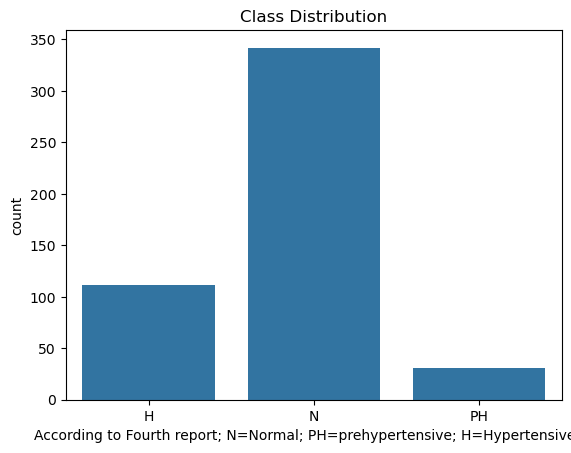

Class Distribution after Additional Augmentation:
According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1
N     342
H     211
PH     31
Name: count, dtype: int64


In [19]:
import pandas as pd
import random

# Set random seed for reproducibility
random.seed(42)

# Load your dataset
df = pd.read_csv('augmented_thesis_data.csv')

# Filter hypertensive cases
hypertensive_df = df[df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'] == 'H']

# Function to augment hypertensive cases
def augment_hypertensive_cases(df, target_rows, age_variation=1, bp_variation=5, weight_variation=1, height_variation=0.02):
    augmented_records = []

    while len(augmented_records) < target_rows:
        row = df.sample(n=1).iloc[0]
        new_row = row.copy()

        # Randomize age with slight variations
        new_row['Age (years)'] = max(0, row['Age (years)'] + random.randint(-age_variation, age_variation))

        # Randomize blood pressure values
        new_row['SBP3'] = max(120, min(160, row['SBP3'] + random.randint(-bp_variation, bp_variation)))
        new_row['Mean SBP (not rounded)'] = new_row['SBP3']
        new_row['Mean SBP (Rounded to two digits)'] = round(new_row['SBP3'], 1)

        new_row['DBP1'] = max(80, min(100, row['DBP1'] + random.randint(-bp_variation, bp_variation)))
        new_row['DBP2'] = max(80, min(100, row['DBP2'] + random.randint(-bp_variation, bp_variation)))
        new_row['DBP3'] = max(80, min(100, row['DBP3'] + random.randint(-bp_variation, bp_variation)))

        # Add slight variations to weight and height to affect BMI
        new_row['Weight (Kg)'] = max(10, row['Weight (Kg)'] + random.uniform(-weight_variation, weight_variation))
        new_row['Height (metre)'] = max(0.5, row['Height (metre)'] + random.uniform(-height_variation, height_variation))
        new_row['Height (in cm)'] = new_row['Height (metre)'] * 100

        # Keep it classified as hypertensive
        new_row['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'] = 'H'

        augmented_records.append(new_row)

    return pd.DataFrame(augmented_records)

# Specify how many new hypertensive cases you want to create
num_to_augment = 100
augmented_hypertensive_df = augment_hypertensive_cases(hypertensive_df, num_to_augment)

# Combine original data with augmented hypertensive cases
balanced_df = pd.concat([df, augmented_hypertensive_df], ignore_index=True)

# Clean up the class column by removing leading/trailing spaces and standardizing labels
balanced_df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'] = \
    balanced_df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'].str.strip()

# Check class distribution after augmentation
class_counts = balanced_df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'].value_counts()
print("Class Distribution after Augmentation:")
print(class_counts)

# Optionally, visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1', data=balanced_df)
plt.title("Class Distribution")
plt.show()

# Filter and augment prehypertensive cases similarly
prehypertensive_df = balanced_df[balanced_df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'] == 'PH']
num_to_augment_ph = 100
augmented_prehypertensive_df = augment_hypertensive_cases(prehypertensive_df, num_to_augment_ph)

# Combine the augmented hypertensive and prehypertensive cases with the original dataset
balanced_df = pd.concat([balanced_df, augmented_prehypertensive_df], ignore_index=True)

# Recheck the class distribution after additional augmentation
class_counts = balanced_df['According to Fourth report; N=Normal; PH=prehypertensive; H=Hypertensive).1'].value_counts()
print("Class Distribution after Additional Augmentation:")
print(class_counts)
